### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
nop=0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import requests
#url = 'https://min-api.cryptocompare.com/data/histominute'+'?fsym=BTC'+'&tsym=USD'+'&limit=2000'+'&aggregate=1'          
def csvm(url,coun,nop):
    response = requests.get(url)
    data = response.json()['Data']
   # print(data)
    import pandas as pd
    df = pd.DataFrame(data)
    if coun==0:
        d=df.iloc[0,0]
    else:
        d=10
    print(d)
    #df["time"] = pd.to_datetime(df['time'], unit='s')
    
    df=df.rename(columns={"time": "timestamp"})
    print(df)
    aj=['volumefrom', 'volumeto','conversionType', 'conversionSymbol']
    df=df.drop(aj,axis=1)
        
    #print(df)
    #df.to_csv("Prices"+str(nop)+".csv")
    return d,df

In [4]:
url = 'https://min-api.cryptocompare.com/data/histominute'+'?fsym=BTC'+'&tsym=USD'+'&limit=2000'+'&aggregate=5'

In [5]:
def fx(url,nop):
    #  
    for i in range(5):
        if i==0:
            n,a=csvm(url,0,nop)
            print(a)
        elif i==1:
            url=url+"&toTs="+str(n)
            print(url)
            n-=120000
            m,ab=csvm(url,1,nop)
            print(ab)
           # print(n)
            a=pd.concat([ab,a],ignore_index=True)
        else:
            url=url[:-16]+"&toTs="+str(n)
            print(url)
            n-=120000
            m,ab=csvm(url,1,nop)
            print(ab)
           # print(n)
            a=pd.concat([ab,a],ignore_index=True)
        a.to_csv("Prices"+str(nop)+".csv")

In [6]:
testt=fx(url,nop)
testt=pd.read_csv("Prices"+str(nop)+".csv")

testt

1608276300
      timestamp      high       low      open  volumefrom     volumeto  \
0    1608276300  22915.17  22888.05  22901.87       81.41   1864733.00   
1    1608276600  22946.38  22902.79  22903.21      118.26   2709145.99   
2    1608276900  23007.08  22935.70  22937.53      208.96   4803327.30   
3    1608277200  23028.26  22993.19  23007.05      152.09   3491010.33   
4    1608277500  23054.21  23011.81  23016.86      168.93   3892349.33   
..          ...       ...       ...       ...         ...          ...   
396  1608395100  24017.59  23861.32  23953.88      848.89  20296794.50   
397  1608395400  23944.23  23831.12  23910.07      630.28  15058235.67   
398  1608395700  23943.73  23828.68  23927.87      361.63   8645303.88   
399  1608396000  24085.09  23894.06  23925.64      913.48  21983460.59   
400  1608396300  24088.29  24014.44  24066.93      157.38   3790105.63   

        close conversionType conversionSymbol  
0    22903.21         direct                   
1   

,Unnamed: 0,timestamp,high,low,open,close
0,0,1607796300,18595.87,18580.55,18594.68,18590.41
1,1,1607796600,18595.02,18581.44,18590.41,18588.47
2,2,1607796900,18636.46,18587.87,18588.47,18633.21
3,3,1607797200,18740.98,18633.21,18633.21,18721.92
4,4,1607797500,18731.60,18694.38,18721.92,18706.79
...,...,...,...,...,...,...
2000,2000,1608395100,24017.59,23861.32,23953.88,23910.07
2001,2001,1608395400,23944.23,23831.12,23910.07,23927.87
2002,2002,1608395700,23943.73,23828.68,23927.87,23925.64
2003,2003,1608396000,24085.09,23894.06,23925.64,24066.93


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [8]:
#csvm(url,0,0)
df=pd.read_csv("Prices"+str(nop)+".csv")
#df=df[::-1#].reset_index().drop(columns=["index"])
df["timestamp"]=pd.to_datetime(df["timestamp"],unit="s")
df

,Unnamed: 0,timestamp,high,low,open,close
0,0,2020-12-12 18:05:00,18595.87,18580.55,18594.68,18590.41
1,1,2020-12-12 18:10:00,18595.02,18581.44,18590.41,18588.47
2,2,2020-12-12 18:15:00,18636.46,18587.87,18588.47,18633.21
3,3,2020-12-12 18:20:00,18740.98,18633.21,18633.21,18721.92
4,4,2020-12-12 18:25:00,18731.60,18694.38,18721.92,18706.79
...,...,...,...,...,...,...
2000,2000,2020-12-19 16:25:00,24017.59,23861.32,23953.88,23910.07
2001,2001,2020-12-19 16:30:00,23944.23,23831.12,23910.07,23927.87
2002,2002,2020-12-19 16:35:00,23943.73,23828.68,23927.87,23925.64
2003,2003,2020-12-19 16:40:00,24085.09,23894.06,23925.64,24066.93


In [9]:
df.head()

,Unnamed: 0,timestamp,high,low,open,close
0,0,2020-12-12 18:05:00,18595.87,18580.55,18594.68,18590.41
1,1,2020-12-12 18:10:00,18595.02,18581.44,18590.41,18588.47
2,2,2020-12-12 18:15:00,18636.46,18587.87,18588.47,18633.21
3,3,2020-12-12 18:20:00,18740.98,18633.21,18633.21,18721.92
4,4,2020-12-12 18:25:00,18731.60,18694.38,18721.92,18706.79


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2005 non-null   int64         
 1   timestamp   2005 non-null   datetime64[ns]
 2   high        2005 non-null   float64       
 3   low         2005 non-null   float64       
 4   open        2005 non-null   float64       
 5   close       2005 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.1 KB


In [11]:
df1=df.reset_index()['close']
df11=pd.to_datetime(df["timestamp"])

In [12]:
df11

0      2020-12-12 18:05:00
1      2020-12-12 18:10:00
2      2020-12-12 18:15:00
3      2020-12-12 18:20:00
4      2020-12-12 18:25:00
               ...        
2000   2020-12-19 16:25:00
2001   2020-12-19 16:30:00
2002   2020-12-19 16:35:00
2003   2020-12-19 16:40:00
2004   2020-12-19 16:45:00
Name: timestamp, Length: 2005, dtype: datetime64[ns]

In [13]:
dgp=df1

dgp

0       18590.41
1       18588.47
2       18633.21
3       18721.92
4       18706.79
          ...   
2000    23910.07
2001    23927.87
2002    23925.64
2003    24066.93
2004    24080.73
Name: close, Length: 2005, dtype: float64

In [14]:
import plotly.graph_objects as go

fig=go.Figure(data=go.Scatter(x=df11,y=df1,mode="lines",marker_color="seagreen"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title="Stock")
fig.show()

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
df1

0       18590.41
1       18588.47
2       18633.21
3       18721.92
4       18706.79
          ...   
2000    23910.07
2001    23927.87
2002    23925.64
2003    24066.93
2004    24080.73
Name: close, Length: 2005, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[3.53224356e-04]
 [0.00000000e+00]
 [8.14600911e-03]
 ...
 [9.71762080e-01]
 [9.97487373e-01]
 [1.00000000e+00]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(1704, 301)

In [22]:
train_data

array([[3.53224356e-04],
       [0.00000000e+00],
       [8.14600911e-03],
       ...,
       [7.17684523e-01],
       [7.15155510e-01],
       [7.05054021e-01]])

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(1603, 100)
(1603,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(200, 100)
(200,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50,return_sequences=True))
model.add(GRU(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
gru (GRU)                    (None, 100, 50)           15300     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 66,151
Trainable params: 66,151
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
gru (GRU)                    (None, 100, 50)           15300     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 66,151
Trainable params: 66,151
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
26/26 [==============================] - 7s 257ms/step - loss: 0.0434 - val_loss: 0.0018
Epoch 2/200
26/26 [==============================] - 6s 218ms/step - loss: 0.0026 - val_loss: 7.8201e-04
Epoch 3/200
26/26 [==============================] - 6s 239ms/step - loss: 7.7013e-04 - val_loss: 0.0012
Epoch 4/200
26/26 [==============================] - 5s 204ms/step - loss: 6.9034e-04 - val_loss: 0.0011
Epoch 5/200
26/26 [==============================] - 5s 204ms/step - loss: 6.6130e-04 - val_loss: 0.0013
Epoch 6/200
26/26 [==============================] - 5s 206ms/step - loss: 6.8250e-04 - val_loss: 0.0016
Epoch 7/200
26/26 [==============================] - 5s 207ms/step - loss: 6.6945e-04 - val_loss: 0.0017
Epoch 8/200
26/26 [==============================] - 6s 219ms/step - loss: 6.4299e-04 - val_loss: 7.3169e-04
Epoch 9/200
26/26 [==============================] - 5s 203ms/step - loss: 6.3848e-04 - val_loss: 7.2833e-04
Epoch 10/200
26/26 [==============================]

In [33]:
import tensorflow as tf

In [34]:
import os 
aa=os.listdir()
aa

['Prices0.csv', '__notebook__.ipynb']

In [35]:
tf.__version__

'2.3.1'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20489.350529420404

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

23084.46548985164

In [40]:
#### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions


In [41]:

trPP=trainPredictPlot.ravel()
tePP=testPredictPlot.ravel()
bc={"Date":df11.ravel(),"Main":dgp.ravel(),"Train":trPP,"Test":tePP}
bc=pd.DataFrame(data=bc)
#bc=pd.DataFrame(trainPredictPlot,testPredictPlot#,columns=["Train","Test"])
bc

,Date,Main,Train,Test
0,2020-12-12 18:05:00,18590.41,NaN,NaN
1,2020-12-12 18:10:00,18588.47,NaN,NaN
2,2020-12-12 18:15:00,18633.21,NaN,NaN
3,2020-12-12 18:20:00,18721.92,NaN,NaN
4,2020-12-12 18:25:00,18706.79,NaN,NaN
...,...,...,...,...
2000,2020-12-19 16:25:00,23910.07,NaN,23804.841797
2001,2020-12-19 16:30:00,23927.87,NaN,23794.310547
2002,2020-12-19 16:35:00,23925.64,NaN,23804.269531
2003,2020-12-19 16:40:00,24066.93,NaN,23804.873047


In [42]:
bc.to_csv("TestingData.csv")

In [43]:
!pip install plotly

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [44]:
bc["Date"]=pd.to_datetime(bc["Date"])

In [45]:
len(trainPredictPlot)

2005

In [46]:
len(test_data)

301

In [47]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [48]:
df11

0      2020-12-12 18:05:00
1      2020-12-12 18:10:00
2      2020-12-12 18:15:00
3      2020-12-12 18:20:00
4      2020-12-12 18:25:00
               ...        
2000   2020-12-19 16:25:00
2001   2020-12-19 16:30:00
2002   2020-12-19 16:35:00
2003   2020-12-19 16:40:00
2004   2020-12-19 16:45:00
Name: timestamp, Length: 2005, dtype: datetime64[ns]

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.789591170119404,
 0.7909439829869673,
 0.7863338589214641,
 0.7869529119160412,
 0.7973511814808476,
 0.802117889539097,
 0.794303255854603,
 0.7989588985226486,
 0.7996125456551586,
 0.8022325964175043,
 0.8050347215900193,
 0.8012348286497724,
 0.8017774103920794,
 0.8038785490854408,
 0.8067698907189391,
 0.8002989661814985,
 0.7980048286133576,
 0.7993594622250213,
 0.80810995837779,
 0.8120901049841049,
 0.8148703812274003,
 0.8104204826428458,
 0.8052714183232399,
 0.8044721116625939,
 0.8118479460185788,
 0.8039422751289993,
 0.8027788196480139,
 0.805273239067342,
 0.8007832841125517,
 0.8061945355828013,
 0.8132135040948527,
 0.8139053868534991,
 0.8073379628786692,
 0.8002789379963802,
 0.7978245749472896,
 0.7986056741669185,
 0.7988423709001391,
 0.7956852006277928,
 0.7979356403374926,
 0.7854052794295971,
 0.7880125849832305,
 0.7854180246383087,
 0.7971181262358304,
 0.7936823821159229,
 0.8045285547297474,
 0.8016226471434345,
 0.7994978387767513,
 0.7991573596297337

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9719605]
101
1 day input [0.79094398 0.78633386 0.78695291 0.79735118 0.80211789 0.79430326
 0.7989589  0.79961255 0.8022326  0.80503472 0.80123483 0.80177741
 0.80387855 0.80676989 0.80029897 0.79800483 0.79935946 0.80810996
 0.8120901  0.81487038 0.81042048 0.80527142 0.80447211 0.81184795
 0.80394228 0.80277882 0.80527324 0.80078328 0.80619454 0.8132135
 0.81390539 0.80733796 0.80027894 0.79782457 0.79860567 0.79884237
 0.7956852  0.79793564 0.78540528 0.78801258 0.78541802 0.79711813
 0.79368238 0.80452855 0.80162265 0.79949784 0.79915736 0.81444979
 0.81572613 0.81621409 0.8185319  0.81519447 0.81252162 0.81462822
 0.80331412 0.81129626 0.81814772 0.81814044 0.82287619 0.82007953
 0.82054018 0.82454035 0.8229381  0.83730195 0.83513162 0.87748213
 0.88417154 0.89749211 0.89261069 0.88931697 0.83552672 0.8558353
 0.86268858 0.86756818 0.86372277 0.85400363 0.85860465 0.87163572
 0.8940946  0.89571142 0.9138606  0.90210769 0.91487839 0.90641011
 0.88751261 0.88261117 0.89012538 0.

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

2005

In [55]:
#plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))
pllt=scaler.inverse_transform(df1[-100:]).tolist()
pllt.extend(scaler.inverse_transform(lst_output).tolist())
jlk=[]
for i in pllt:
  jlk.append(i[0])

jlk

[22925.109999999997,
 22932.54,
 22907.22,
 22910.62,
 22967.73,
 22993.91,
 22950.99,
 22976.56,
 22980.15,
 22994.540000000005,
 23009.93,
 22989.059999999998,
 22992.04,
 23003.58,
 23019.460000000003,
 22983.92,
 22971.32,
 22978.759999999995,
 23026.82,
 23048.68,
 23063.95,
 23039.51,
 23011.23,
 23006.84,
 23047.35,
 23003.929999999997,
 22997.54,
 23011.24,
 22986.580000000005,
 23016.299999999996,
 23054.849999999995,
 23058.65,
 23022.58,
 22983.81,
 22970.33,
 22974.62,
 22975.92,
 22958.58,
 22970.94,
 22902.12,
 22916.44,
 22902.19,
 22966.450000000004,
 22947.579999999998,
 23007.15,
 22991.19,
 22979.52,
 22977.65,
 23061.64,
 23068.65,
 23071.33,
 23084.060000000005,
 23065.73,
 23051.05,
 23062.619999999995,
 23000.48,
 23044.32,
 23081.950000000004,
 23081.909999999996,
 23107.92,
 23092.56,
 23095.09,
 23117.06,
 23108.26,
 23187.149999999998,
 23175.23,
 23407.83,
 23444.570000000003,
 23517.730000000003,
 23490.92,
 23472.83,
 23177.4,
 23288.94,
 23326.58000000000

In [56]:
pllt=pd.Series(jlk)
pllt.to_csv("Extended.csv")

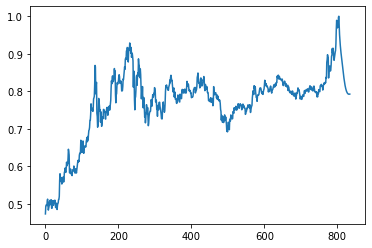

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

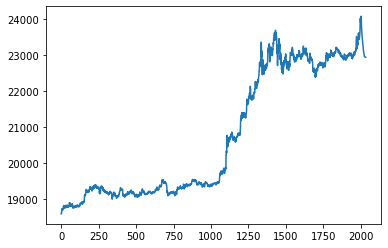

In [59]:
plt.plot(df3)

In [60]:
testt["timestamp"] = pd.to_datetime(testt['timestamp'], unit='s')
testt1=testt["close"][-100:]
df12=testt["timestamp"]
df2=testt1
iop=[]
def turn(testt1):
    testt1=scaler.fit_transform(np.array(testt1).reshape(-1,1))
    x_input=testt1.reshape(1,-1)
    x_input = x_input.reshape((1, 100, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    yhat=(scaler.inverse_transform(yhat))
    print("{} minute output".format(yhat))
    return yhat
yo=turn(testt1)
iop.append(yo)
yo=pd.Series(yo[0][0])
testt1=testt1.append(yo, ignore_index=True)
testt1=testt1.iloc[1:]
yo=turn(testt1)
iop.append(yo)

[[24014.633]] minute output
[[23988.088]] minute output


In [61]:
yhat=pd.Series(np.ravel(iop))

In [62]:
df2=df2.append(yhat,ignore_index=True)

In [63]:
df2

0      22925.110000
1      22932.540000
2      22907.220000
3      22910.620000
4      22967.730000
           ...     
97     23925.640000
98     24066.930000
99     24080.730000
100    24014.632812
101    23988.087891
Length: 102, dtype: float64

In [64]:
import plotly.graph_objects as go
ann=df12.iloc[-100]
ann=pd.date_range(start=ann,periods=102 ,freq='5T')
ann

DatetimeIndex(['2020-12-19 08:30:00', '2020-12-19 08:35:00',
               '2020-12-19 08:40:00', '2020-12-19 08:45:00',
               '2020-12-19 08:50:00', '2020-12-19 08:55:00',
               '2020-12-19 09:00:00', '2020-12-19 09:05:00',
               '2020-12-19 09:10:00', '2020-12-19 09:15:00',
               ...
               '2020-12-19 16:10:00', '2020-12-19 16:15:00',
               '2020-12-19 16:20:00', '2020-12-19 16:25:00',
               '2020-12-19 16:30:00', '2020-12-19 16:35:00',
               '2020-12-19 16:40:00', '2020-12-19 16:45:00',
               '2020-12-19 16:50:00', '2020-12-19 16:55:00'],
              dtype='datetime64[ns]', length=102, freq='5T')

In [65]:
import plotly.graph_objects as go

fig=go.Figure(data=go.Scatter(x=ann,y=df2,mode="lines",marker_color="seagreen"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title="Stock")
fig.show()

In [66]:
nop=int(input("Enter the Number in csv :"))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.